 <a id='import_packages'></a>
 # 1. Import Packages

In [98]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

from credit_data_actual_values import substitute


 <a id='load_data'></a>
 # 2. Load Data

In [99]:
#Load the data using pandas read_csv method
df=pd.read_csv('German_Credit_data.csv')
#Display the first few rows in the dataframe
df.head()
#df.shape



,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [100]:
# Shape
df.shape


(1000, 21)

 <a id='Stat_sum'></a>
 # 3. Statistical Summary
 Here we take a look at the summary of each attribute.

 This includes the count, mean, the min and max values as well as percentiles.

In [101]:

df.describe()


,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


 <a id='check_data_type'></a>
 ## 3.3 Checking Data Type and Missing Values

In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Creditability                                      1000 non-null   int64
 1   Status_of_existing_account                         1000 non-null   int64
 2   Duration_of_Credit_month                           1000 non-null   int64
 3   Payment_Status_of_Previous_Credit(Credit_history)  1000 non-null   int64
 4   Purpose_of_loan                                    1000 non-null   int64
 5   Credit_Amount                                      1000 non-null   int64
 6   Value_of_Savings_account&bonds                     1000 non-null   int64
 7   Years_of_Present_Employment                        1000 non-null   int64
 8   Percentage_of_disposable_income                    1000 non-null   int64
 9   Sex_&_Marital_Status           

 There are only 1000 rows in the raw_data data frame and there is no missing values

 <a id='exploratory_data_analysis'></a>
 # 4. Exploratory Data Analysis

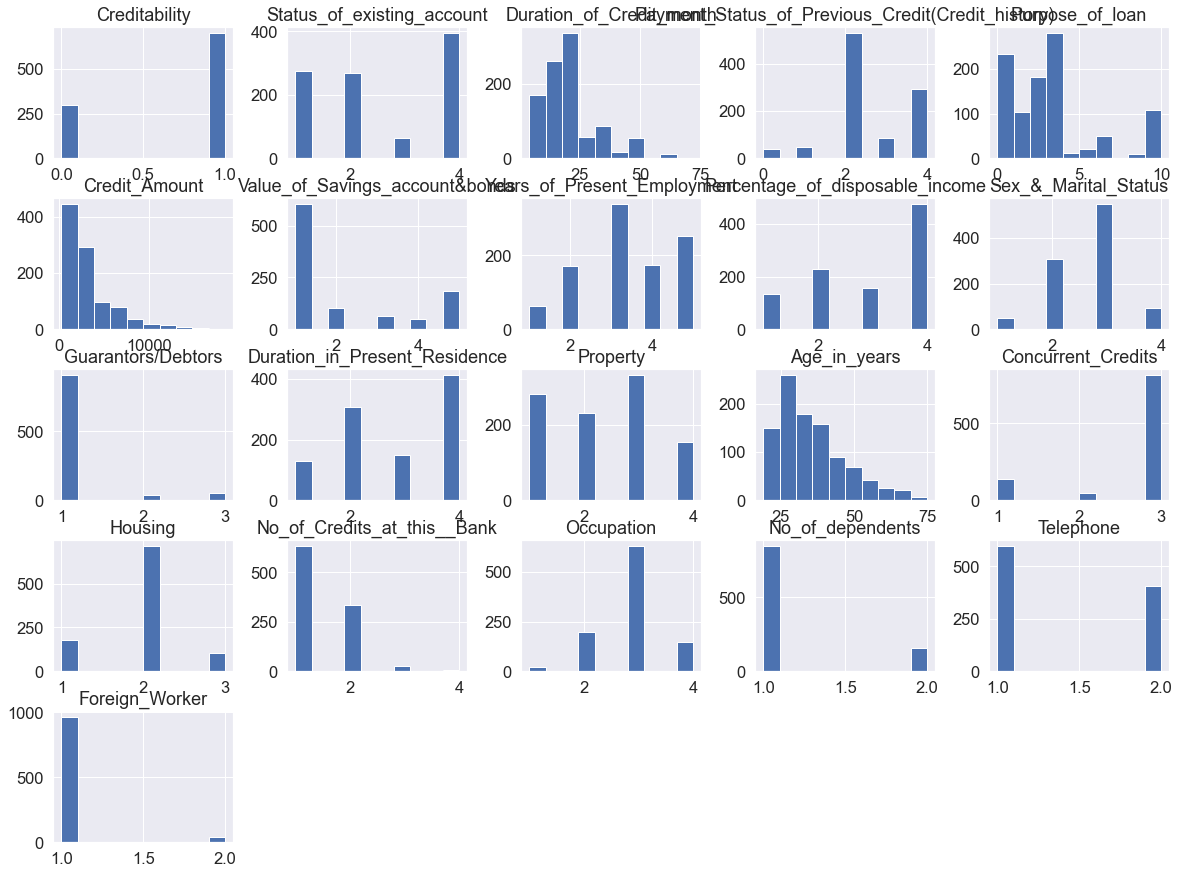

In [103]:
df.hist(figsize=(20,15))
plt.show()


 By visualizing the histogram of each variable, we can see "Age_in_years" and "Credit Amount" are not normally distributed.

In [104]:
# To understand number of levels in each variables 
df.nunique()



Creditability                                          2
Status_of_existing_account                             4
Duration_of_Credit_month                              33
Payment_Status_of_Previous_Credit(Credit_history)      5
Purpose_of_loan                                       10
Credit_Amount                                        923
Value_of_Savings_account&bonds                         5
Years_of_Present_Employment                            5
Percentage_of_disposable_income                        4
Sex_&_Marital_Status                                   4
Guarantors/Debtors                                     3
Duration_in_Present_Residence                          4
Property                                               4
Age_in_years                                          53
Concurrent_Credits                                     3
Housing                                                3
No_of_Credits_at_this__Bank                            4
Occupation                     

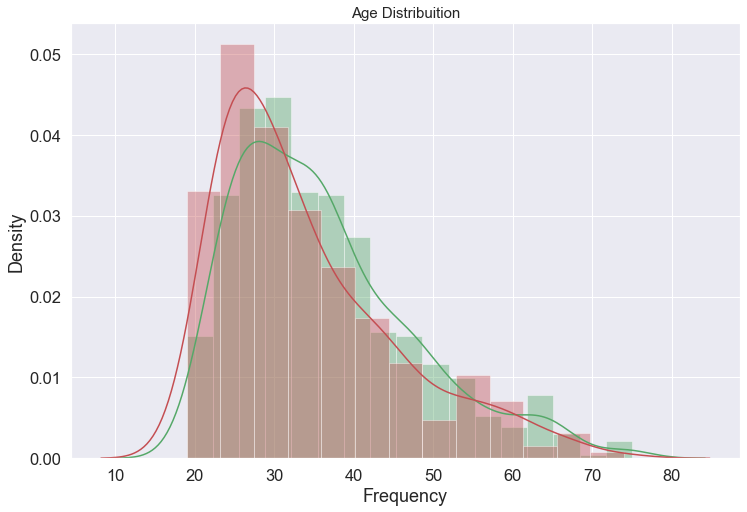

In [105]:
# Ploting Age Distribution
df_good = df[df["Creditability"] == 1]
df_bad = df[df["Creditability"] == 0]

plt.figure(figsize=(12,8))
sns.distplot(df_good["Age_in_years"],color="g")
sns.distplot(df_bad["Age_in_years"],color='r')
plt.title("Age Distribuition", fontsize=15)
plt.xlabel("Age")
plt.xlabel("Frequency")
plt.show()


 <a id='class_distribution'></a>
 # 4.1 Class Distribution
 Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [106]:
print(df.groupby('Creditability').size())



Creditability
0    300
1    700
dtype: int64


In [107]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(df['Creditability'])
percentage_labels = (df['Creditability'].value_counts()/total_len)*100
percentage_labels



1    70.0
0    30.0
Name: Creditability, dtype: float64

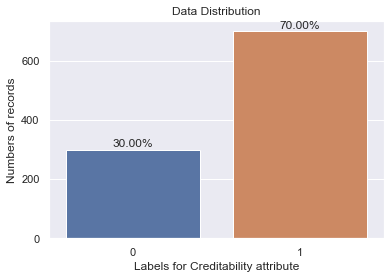

In [108]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(df['Creditability']).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for Creditability attribute")
ax.set_ylabel("Numbers of records")
plt.show()


 <a id='Correlation'></a>
 # 4.2 Correlation

In [109]:
# Check Correlation
df.corr()



,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,...,-0.002967,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.003015,0.036466,0.082079
Status_of_existing_account,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,...,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration_of_Credit_month,-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,...,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment_Status_of_Previous_Credit(Credit_history),0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,...,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose_of_loan,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,...,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit_Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,...,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value_of_Savings_account&bonds,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,...,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Years_of_Present_Employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,...,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Percentage_of_disposable_income,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,...,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex_&_Marital_Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,...,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


Text(0.5, 1.0, 'Correlation between features')

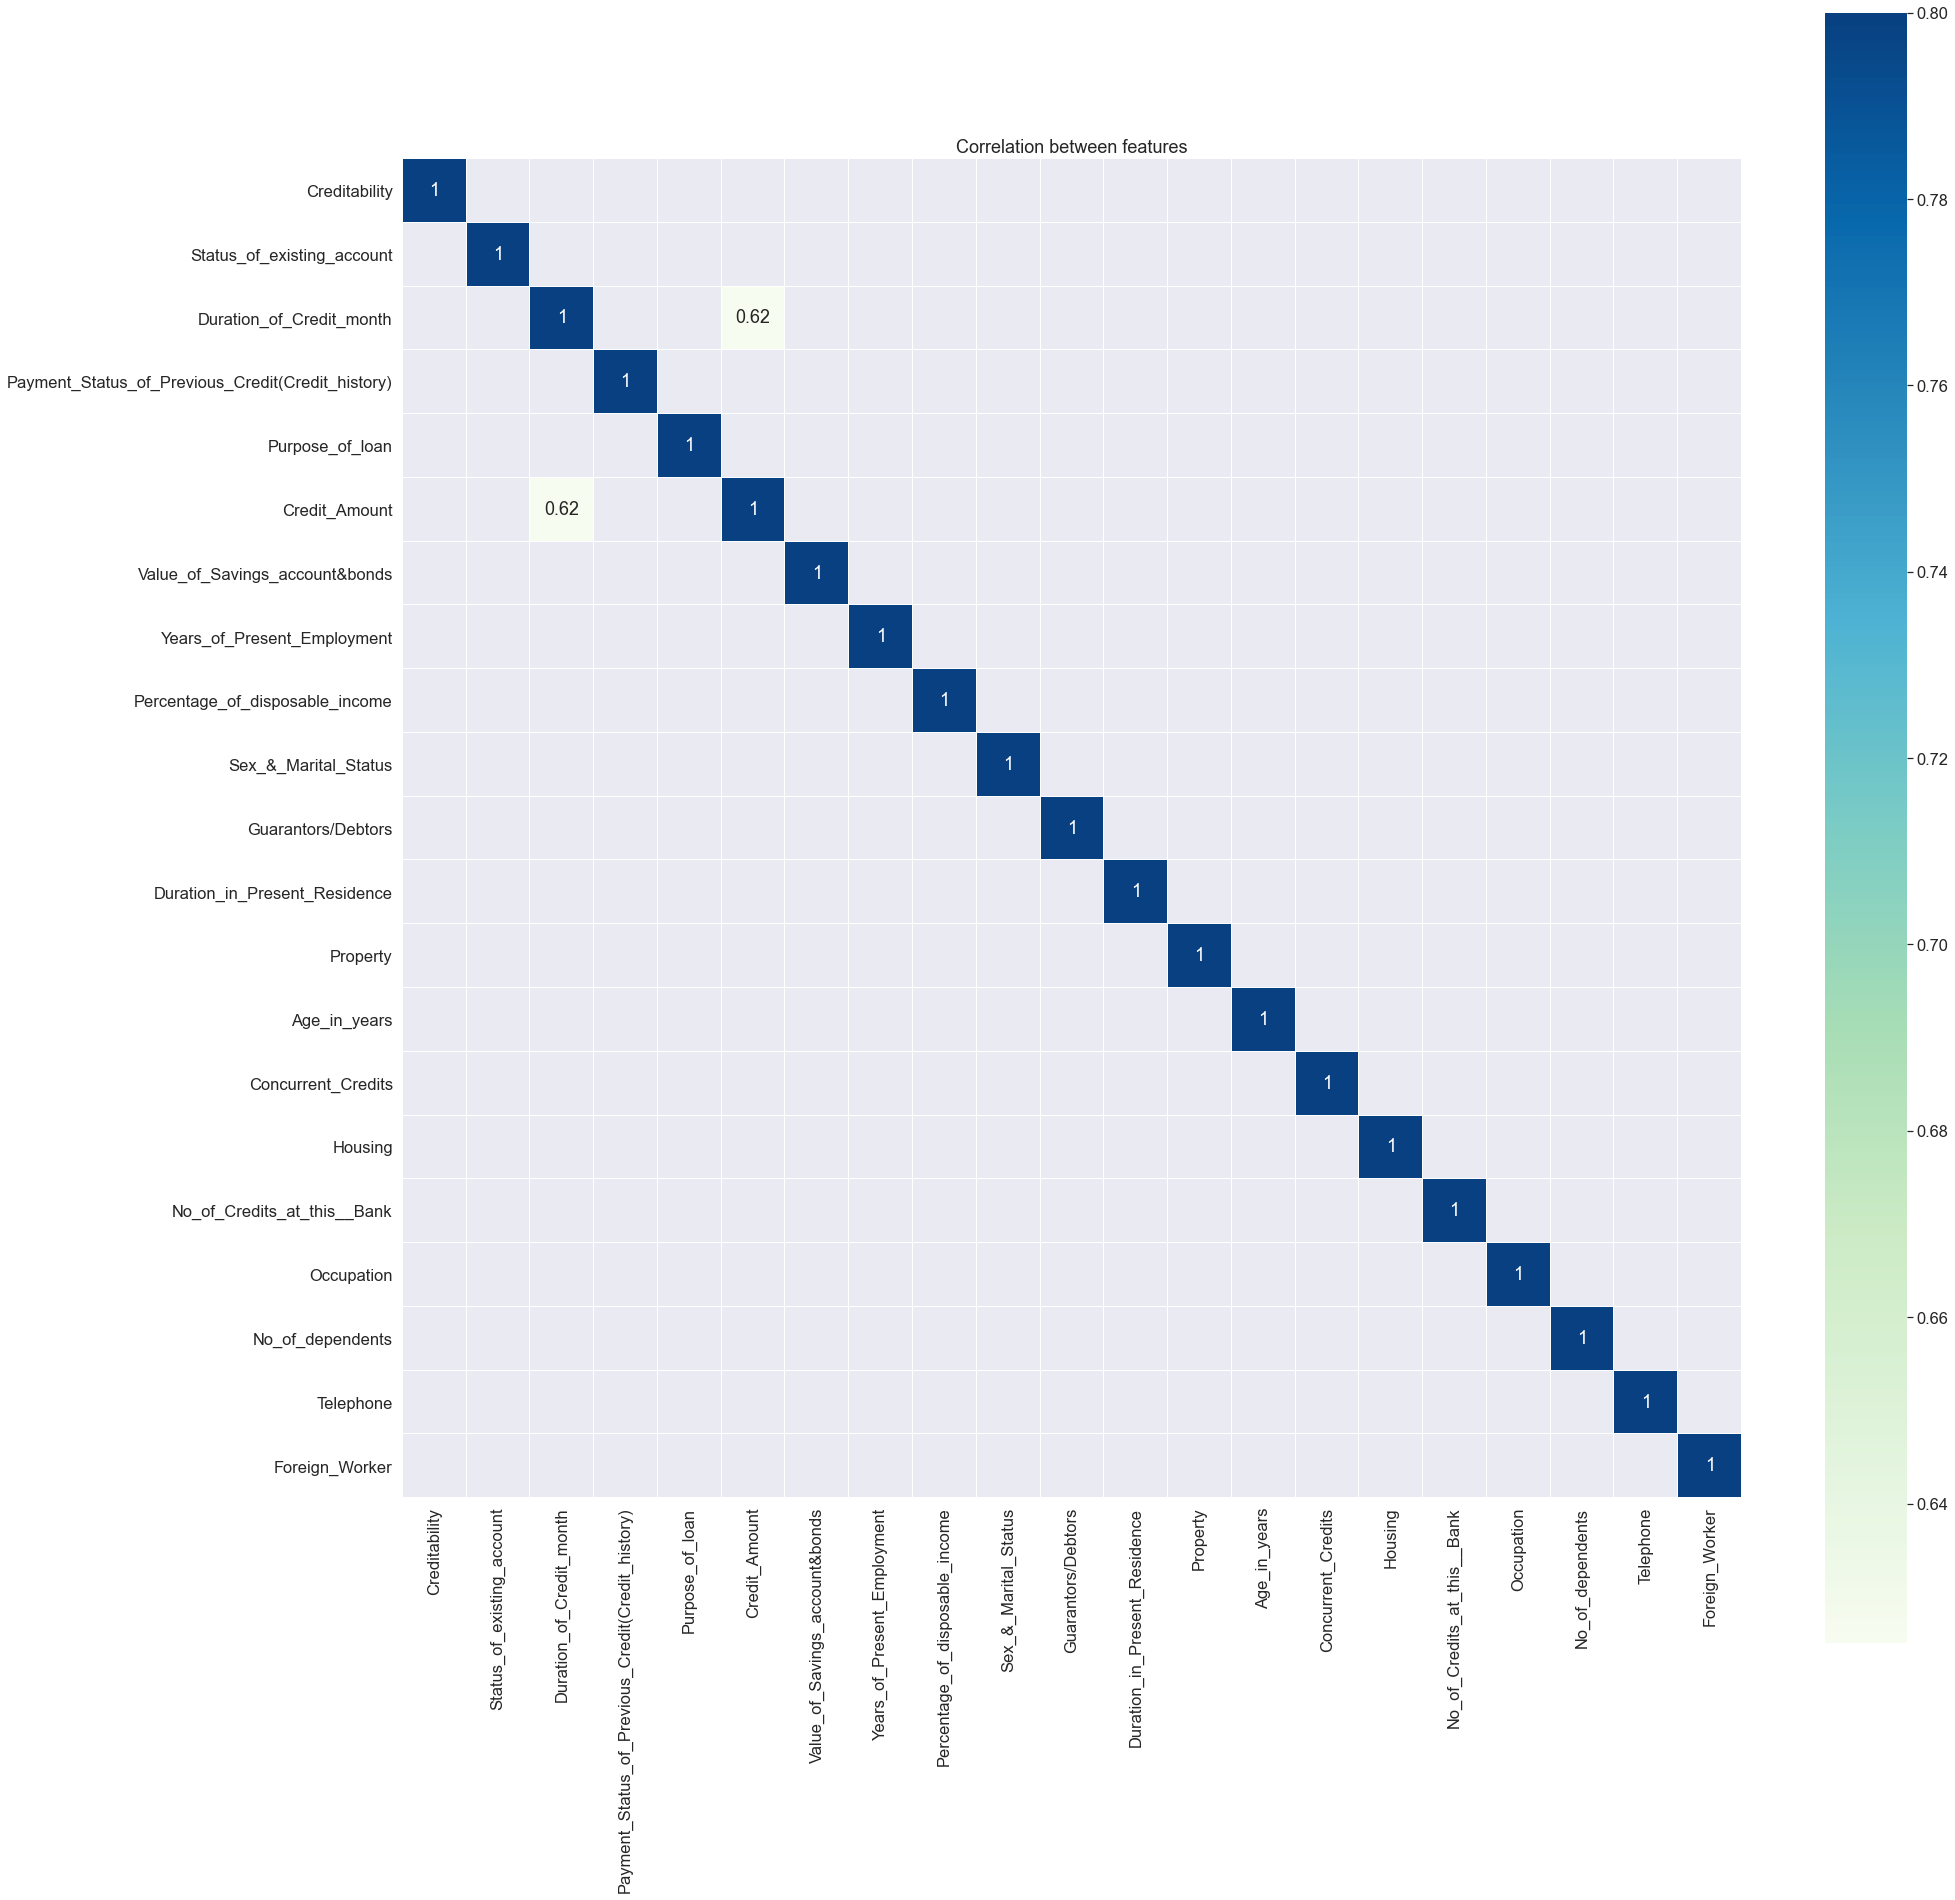

In [110]:
# Checking Correlation and correlation plot
import matplotlib.pyplot as plt
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="white")
plt.title('Correlation between features')


 As we can see "Credit_Amount" and "Duration_of_Credit_month" are highly correlated, we need to treat multicollinearity variables.

 <a id='modeling'></a>
 # 5. Logistic Regression

 <a id='prep_data'></a>
 ## 5.1 Preparation of Datasets

In [111]:
# Spliting Target Variable
predictor= df.iloc[:, df.columns != 'Creditability']
target= df.iloc[:, df.columns == 'Creditability']



In [112]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (700, 20)
x_test  (300, 20)
y_train  (700, 1)
y_test  (300, 1)


In [113]:
# we define functions for all models with do cross validation and
# automatically select best parameters

#defining random forest model

def rf_cross_val(trainx, trainy):
    # using cross validation
    n_estimators = [25, 50, 75, 100, 150, 200, 250, 300]
    criterion = ['gini', 'entropy']
    min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8]
    min_samples_split = [2, 3, 4, 5, 6, 6, 7, 8]
    min_weight_fraction_leaf = [0, 0.01, 0.25, 0.05, 0.75, 0.1, 0.5]
    grid = {'n_estimators': n_estimators, 'criterion': criterion,
            'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split,
            'min_weight_fraction_leaf': min_weight_fraction_leaf}

    cross_val = RandomizedSearchCV(RandomForestClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_
    print('Random Forest cv score',cross_val.best_score_)
    rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                criterion=best_params['criterion']).fit(trainx, trainy)
    return rf


In [114]:
#defining decision tree model
def dt_cross_val(trainx, trainy):
    # using cross validation
    criterion = ['gini', 'entropy']
    splitter = ['best', 'random']
    min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8]
    min_samples_split = [2, 3, 4, 5, 6, 6, 7, 8]
    min_weight_fraction_leaf = [0, 0.01, 0.25, 0.05, 0.75, 0.1, 0.5]
    ccp_alpha = [0, 0.01, 0.025, 0.05, 0.1]
    grid = {'splitter': splitter, 'criterion': criterion,
            'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split,
            'min_weight_fraction_leaf': min_weight_fraction_leaf,
            'ccp_alpha': ccp_alpha}

    cross_val = RandomizedSearchCV(DecisionTreeClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_
    print('Decision Tree cv score',cross_val.best_score_)
    df = DecisionTreeClassifier(splitter=best_params['splitter'],
                                min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                criterion=best_params['criterion'],
                                ccp_alpha=best_params['ccp_alpha']).fit(trainx, trainy)
    return df


In [115]:
# defining knn model
def knn_cross_val(trainx, trainy):
    # using cross validation
    n_neighbors = range(3, 12, 2)
    weights = ['uniform', 'distance']
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
    metric = ['minkowski', 'euclidean', 'manhatten']
    leaf_size = [10, 20, 30, 40, 50, 60, 70]
    grid = {'n_neighbors': n_neighbors, 'weights': weights,
            'algorithm': algorithm, 'metric': metric,
            'leaf_size': leaf_size}

    cross_val = RandomizedSearchCV(KNeighborsClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_
    print('Knn cv score',cross_val.best_score_)
    knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                               weights=best_params['weights'],
                               algorithm=best_params['algorithm'],
                               metric=best_params['metric'],
                               leaf_size=best_params['leaf_size']).fit(trainx, trainy)
    return knn


In [116]:
# defining svm model

def svm_cross_val(trainx, trainy):
    # using cross validation
    C = [0.01, 0.05, 0.1, 0.25, 0.5, 1]
    penalty = ['l1', 'l2']
    # loss = ['hinged', 'squared_hinge']
    max_iter = [1000, 2500, 5000]
    grid = {'penalty': penalty, 'C': C,
            # 'loss': loss,
             'max_iter': max_iter}

    cross_val = RandomizedSearchCV(svm.LinearSVC(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_
    print('SVM cv score',cross_val.best_score_)
    svc = svm.LinearSVC(penalty=best_params['penalty'],
                        C=best_params['C'],
                        # loss=best_params['loss'],
                        max_iter=best_params['max_iter']).fit(trainx, trainy)
    return svc


In [117]:
# defining adaboost model

def ada_cross_val(trainx, trainy):
    # using cross validation
    base_estimator = [DecisionTreeClassifier(
        max_depth=1), RandomForestClassifier(max_depth=1)]
    n_estimators = [30, 50, 70, 100, 125, 150]
    learning_rate = [0.01, 0.02, 0.05, 0.1, 0.5, 1]
    algorithm = ['SAMME', 'SAMME.R']
    grid = {'base_estimator': base_estimator, 'n_estimators': n_estimators,
            'learning_rate': learning_rate, 'algorithm': algorithm}

    cross_val = RandomizedSearchCV(AdaBoostClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_
    print('Adaboost cv score',cross_val.best_score_)
    ada = AdaBoostClassifier(base_estimator=best_params['base_estimator'],
                             n_estimators=best_params['n_estimators'],
                             learning_rate=best_params['learning_rate'],
                             algorithm=best_params['algorithm']).fit(trainx, trainy)
    return ada


In [118]:
# defining gradient boost model

def gradient_cross_val(trainx, trainy):
    # using cross validation
    n_estimators = [10, 25, 50, 75, 100, 150, 200, 250]
    min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8]
    min_samples_split = [2, 3, 4, 5, 6, 6, 7, 8]
    min_weight_fraction_leaf = [0, 0.01, 0.25, 0.05, 0.75, 0.1, 0.5]
    grid = {'n_estimators': n_estimators,
            'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split,
            'min_weight_fraction_leaf': min_weight_fraction_leaf}

    cross_val = RandomizedSearchCV(GradientBoostingClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_
    print('Gradient Boost cv score',cross_val.best_score_)
    gradient = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],
                                          min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
                                          min_samples_split=best_params['min_samples_split'],
                                          min_samples_leaf=best_params['min_samples_leaf'],).fit(trainx, trainy)
    return gradient




In [119]:
# Building a function that will run all models

def run_model(trainx, trainy):

    # decision Tree Model
    model_dt = dt_cross_val(trainx, trainy)

    # Random forest Model
    model_rf = rf_cross_val(trainx, trainy)
    # knn forest Model
    model_knn = knn_cross_val(trainx, trainy)
    # svm Model
    model_svm = svm_cross_val(trainx, trainy)
    # gradient boost Model
    model_gradient = gradient_cross_val(trainx, trainy)
    # Adaboost Model
    # using 1 features i.e 1 stump for Adaboost

    # model_ada = ada_cross_val(trainx, trainy)

    # XGBoost Model
    model_xgb = xgb.XGBClassifier(n_estimators=100).fit(trainx, trainy)
    model_vc = VotingClassifier(estimators=[('dt', model_dt), ('rf', model_rf),
                                            ('knn', model_knn), ('svm', model_svm),
                                            ('gradient',
                                             model_gradient),# ('ada', model_ada),
                                            ('xgb', model_xgb)], voting='hard').fit(trainx, trainy)
    
    return [model_dt, model_rf, model_knn, model_svm, model_gradient, model_xgb, model_vc]



In [120]:

# building funtion to plot ROC AUC curve and get metrics
def get_results(model, testx, testy):
    # unpacking the models
    model_dt, model_rf, model_knn, model_svm, model_gradient, model_xgb, model_vc = model

    # predicting the values
    p_dt = model_dt.predict(testx)
    p_rf = model_rf.predict(testx)
    p_knn = model_knn.predict(testx)
    p_svm = model_svm.predict(testx)
    p_gradient = model_gradient.predict(testx)
    p_xgb = model_xgb.predict(testx)
    p_vc = model_vc.predict(testx)

    # creating lists to store result
    model_name = np.array(['Decision Tree', 'Random Forest', 'knn',
                           'svm', 'Gradientb', 'XGBoost', 'Voting'])

    accuracy = np.round(np.array([accuracy_score(testy, p_dt), accuracy_score(testy, p_rf),
                                  accuracy_score(testy, p_knn), accuracy_score(testy, p_svm),
                                  accuracy_score(testy, p_gradient),
                                  accuracy_score(testy, p_xgb),accuracy_score(testy, p_vc)]), 2)

    f1score = np.round(np.array([f1_score(testy, p_dt), f1_score(testy, p_rf),
                                 f1_score(testy, p_knn), f1_score(testy, p_svm),
                                 f1_score(testy, p_gradient),
                                 f1_score(testy, p_xgb),f1_score(testy, p_vc)]), 2)

    # unpacking fpr,tpr
    fpr_dt, tpr_dt, thres_dt = roc_curve(testy, p_dt)
    fpr_rf, tpr_rf, thres_rd = roc_curve(testy, p_rf)
    fpr_knn, tpr_knn, thres_rd = roc_curve(testy, p_knn)
    fpr_svm, tpr_svm, thres_rd = roc_curve(testy, p_svm)
    fpr_gradient, tpr_gradient, thres_ada = roc_curve(testy, p_gradient)
    fpr_xgb, tpr_xgb, thres_xgb = roc_curve(testy, p_xgb)
    fpr_vc, tpr_vc, thres_xgb = roc_curve(testy, p_vc)

    # getting auc
    auc_dt = np.round(auc(fpr_dt, tpr_dt), 2)
    auc_rf = np.round(auc(fpr_rf, tpr_rf), 2)
    auc_knn = np.round(auc(fpr_knn, tpr_knn), 2)
    auc_svm = np.round(auc(fpr_svm, tpr_svm), 2)
    auc_gradient = np.round(auc(fpr_gradient, tpr_gradient), 2)
    auc_xgb = np.round(auc(fpr_xgb, tpr_xgb), 2)
    auc_vc = np.round(auc(fpr_vc, tpr_vc), 2)
    roc_auc = np.array([auc_dt, auc_rf, auc_knn,auc_svm, auc_gradient, auc_xgb,auc_vc])

    # getting the tpr for roc_curve which is sensitivity
    sensitivity = np.round(np.array([tpr_dt[1], tpr_rf[1], tpr_knn[1], tpr_svm[1],
                             tpr_gradient[1], tpr_xgb[1],tpr_vc[1]]), 2)
    # getting the fpr and subtracting from 1 to get specificity
    specificity = np.round(np.array([1-fpr_dt[1], 1-fpr_rf[1], 1-fpr_knn[1], 1-fpr_svm[1],
                             1-fpr_gradient[1], 1-fpr_xgb[1],1-fpr_vc[1]]), 2)
    results = pd.DataFrame({'model': model_name, 'accuracy': accuracy, 'f1_score': f1score,
                            'sensitivity': sensitivity, 'specificity': specificity, 'ROC': roc_auc})

    # plotting ROC AUC
    plt.figure(figsize=(15, 7))
    plt.plot(fpr_dt, tpr_dt, label='Decision Tree AUC: %0.2f' % auc_dt)
    plt.plot(fpr_rf, tpr_rf, label='Random Forest AUC: %0.2f' % auc_rf)
    plt.plot(fpr_knn, tpr_knn, label='knn AUC: %0.2f' % auc_knn)
    plt.plot(fpr_svm, tpr_svm, label='svm AUC: %0.2f' % auc_svm)
    plt.plot(fpr_gradient, tpr_gradient,label='Gradient AUC: %0.2f' % auc_gradient)
    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost AUC: %0.2f' % auc_xgb)
    plt.plot(fpr_vc, tpr_vc, label='Voting AUC: %0.2f' % auc_vc)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC curve')
    plt.legend()
    plt.show()

    return results



In [121]:
# running all models
model = run_model(x_train, y_train)


Decision Tree cv score 0.7185714285714286
Random Forest cv score 0.7571428571428571
Knn cv score 0.7042857142857143
SVM cv score 0.7414285714285714
Gradient Boost cv score 0.7542857142857142
[20:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


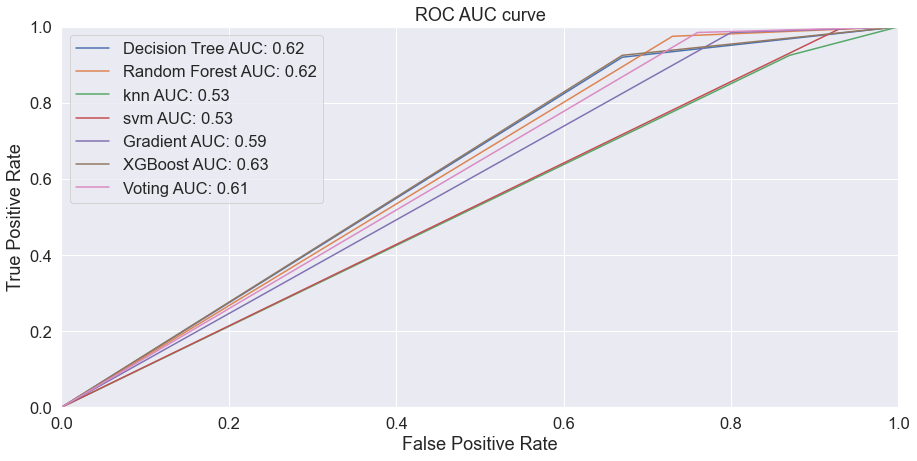

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Decision Tree,0.72,0.82,0.92,0.33,0.62
1,Random Forest,0.74,0.83,0.98,0.27,0.62
2,knn,0.66,0.78,0.92,0.13,0.53
3,svm,0.69,0.81,1.00,0.07,0.53
4,Gradientb,0.72,0.83,0.98,0.20,0.59
5,XGBoost,0.73,0.82,0.92,0.33,0.63
6,Voting,0.74,0.83,0.98,0.24,0.61


In [122]:
# getting results
result = get_results(model, x_test, y_test)
result



In [123]:
best_model = model[1]


In [124]:
# exporting best_model
with open('best_model','wb') as f:
    pickle.dump(best_model,f)
